<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Natural-Language-Processing-Competition---News-Text-Classification" data-toc-modified-id="Natural-Language-Processing-Competition---News-Text-Classification-1">Natural Language Processing Competition - News Text Classification</a></span><ul class="toc-item"><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-1.1">Reading data</a></span></li><li><span><a href="#Analysis-of-data" data-toc-modified-id="Analysis-of-data-1.2">Analysis of data</a></span><ul class="toc-item"><li><span><a href="#Analysis-of-sentence-length" data-toc-modified-id="Analysis-of-sentence-length-1.2.1">Analysis of sentence length</a></span></li><li><span><a href="#Character-distribution-statistics" data-toc-modified-id="Character-distribution-statistics-1.2.2">Character distribution statistics</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.3">Conclusion</a></span></li></ul></li><li><span><a href="#Bag-of-Words--VS--TF-IDF" data-toc-modified-id="Bag-of-Words--VS--TF-IDF-1.3">Bag of Words  VS  TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Theory" data-toc-modified-id="Theory-1.3.1">Theory</a></span></li><li><span><a href="#Count-Vectors-+-RidgeClassifier" data-toc-modified-id="Count-Vectors-+-RidgeClassifier-1.3.2">Count Vectors + RidgeClassifier</a></span></li><li><span><a href="#TF-IDF-+-RidgeClassifier" data-toc-modified-id="TF-IDF-+-RidgeClassifier-1.3.3">TF-IDF + RidgeClassifier</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.3.4">Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.4">Data preprocessing</a></span></li><li><span><a href="#Text-classification-based-on-the-machine-learning-model-:-TF-IDF-+-RidgeClassifierCV" data-toc-modified-id="Text-classification-based-on-the-machine-learning-model-:-TF-IDF-+-RidgeClassifierCV-1.5">Text classification based on the machine learning model : TF-IDF + RidgeClassifierCV</a></span></li></ul></li><li><span><a href="#Final-Ranking-&amp;-Score" data-toc-modified-id="Final-Ranking-&amp;-Score-2">Final Ranking &amp; Score</a></span></li></ul></div>

# Natural Language Processing Competition - News Text Classification

This competition is organized by Alibaba Cloud. 
The challenge is based on natural language processing, which requires contestants to classify news categories based on news text characters, which is a classic text classification problem. 

The question data is news data and the data set is visible and downloadable after registration. The question data is news text and is anonymised according to character level. The integration divides the text data into 14 candidate classification categories: finance, lottery, realty, stocks, furniture, education, technology, society, fashion, politics, sports, horoscope, games and entertainment.

The source of the data for the competition is news from the Internet, which is collected and processed anonymously.

 The contestants can therefore carry out their own data analysis.

The corresponding relationships between categories and numerical labels in the dataset are as follows: 
{'Technology': 0, 'Stocks': 1, 'Sports': 2, 'Entertainment ': 3, 
'Politics': 4, 'Society': 5, 'Education': 6, 'Finance ': 7, 
'Furniture': 8, 'Games': 9, 'Realty': 10, 'Fashion ': 11, 'Lottery': 12, 
'Horoscope': 13}

##  Reading data

In [1]:
import os
os.chdir("C:/Users/c4780/Desktop/NLP")
os.getcwd()

import pandas as pd

train_df = pd.read_csv('train_set.csv', sep='\t')

print(train_df)

        label                                               text
0           2  2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1          11  4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2           3  7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3           2  7159 948 4866 2109 5520 2490 211 3956 5520 549...
4           3  3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
...       ...                                                ...
199995      2  307 4894 7539 4853 5330 648 6038 4409 3764 603...
199996      2  3792 2983 355 1070 4464 5050 6298 3782 3130 68...
199997     11  6811 1580 7539 1252 1899 5139 1386 3870 4124 1...
199998      2  6405 3203 6644 983 794 1913 1678 5736 1397 191...
199999      3  4350 3878 3268 1699 6909 5505 2376 2465 6088 2...

[200000 rows x 2 columns]


The first column is the category of the news and the second column is the character of the news.

##  Analysis of data

### Analysis of sentence length

In [2]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


On average, each sentence consists of 907 characters, 
with the shortest sentence length being 2 and the longest sentence length being 57921.

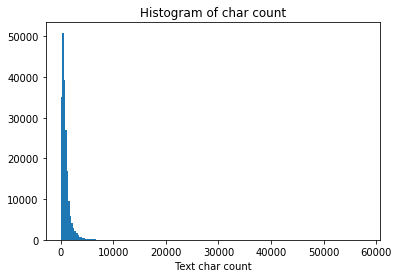

In [3]:
import matplotlib.pyplot as plt

_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel(' Text char count ')
plt.title("Histogram of char count")
plt.savefig('./text_chart_count.png', dpi=750)
plt.show()

Most of the sentences have less than 2000 characters (in term of length).

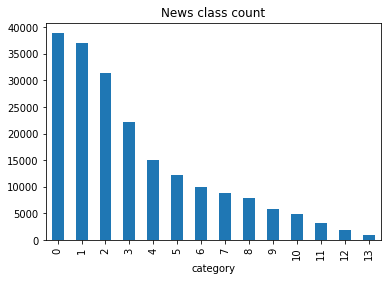

In [4]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")
plt.savefig('./category.png', dpi=750)
plt.show()

In the training set, technology makes up the largest part of news, 
followed by stock news, and the smallest part is horoscope news.

### Character distribution statistics

In [5]:
from collections import Counter

all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print("len(word_count): ", len(word_count)) # 6869

len(word_count):  6869


In [6]:
print("word_count[0]: ", word_count[0]) # ('3750', 7482224)

word_count[0]:  ('3750', 7482224)


In [7]:
print("word_count[-1]: ", word_count[-1]) # ('3133', 1)

word_count[-1]:  ('3133', 1)


A total of 6869 words are included in the training set, 
with the word numbered 3750 appearing most frequently, 
and the word numbered 3133 appearing least frequently.

Based on how the characters appear in each sentence,
We can also guess which character is likely to be a punctuation mark.

In [8]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse = True)

print("word_count[0]: ", word_count[0]) 

word_count[0]:  ('3750', 197997)


In [9]:
print("word_count[1]: ", word_count[1])

word_count[1]:  ('900', 197653)


In [10]:
print("word_count[1]: ", word_count[2])

word_count[1]:  ('648', 191975)


The code above counts the number of times different characters appearing in a sentence,
where character 3750, character 900 and character 648 have close to 99% coverage in 200,000 news items.
These characters are likely to be punctuation marks.

### Conclusion

The imbalance of categories may seriously affect the accuracy of the model.

## Bag of Words  VS  TF-IDF

### Theory

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated.

Cross-validation is a robust measure to prevent overfitting.

Count Vectorizer is a way to convert a given set of strings into a frequency representation.

TF-IDF means Term Frequency - Inverse Document Frequency.This is a statistic that is based on the frequency of a word in the corpus, but it also provides a numerical representation of how important a word is for statistical analysis.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus, 
but also provides the importance of the words. We can then remove the words that are less important for analysis, 
hence making the model building less complex by reducing the input dimensions.

 Let's see if TF-IDF is really better than Count Vectors (Bag of Words) in our case !

### Count Vectors + RidgeClassifier 

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import f1_score

train_df = pd.read_csv('train_set.csv', sep='\t', nrows=15000)

vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(train_df['text'])

clf = RidgeClassifierCV()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))
# 0.7495

0.7495138723728832


### TF-IDF + RidgeClassifier

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import f1_score

train_df = pd.read_csv('train_set.csv', sep='\t', nrows=15000)

tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=3000)
train_test = tfidf.fit_transform(train_df['text'])

clf = RidgeClassifierCV()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))
# 0.8719

0.8719372173702


0.8719 > 0.7495 \
=> In the condition of using exactly the same classifier, TF-IDF is really better than Count Vectors !

###  Conclusion

Therefore, we will focus on the TF-IDF and improve our Ridge regression model for the entire training set !

##  Data preprocessing

In [13]:
import pandas as pd

import os
os.chdir("C:/Users/c4780/Desktop/NLP")
os.getcwd()

train_df = pd.read_csv('train_set.csv', sep='\t') 
test_df = pd.read_csv('test_a.csv')

# concat:
df = pd.concat([train_df,test_df])

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [14]:
df[199999:]

,label,text
199999,3.0,4350 3878 3268 1699 6909 5505 2376 2465 6088 2...
0,NaN,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,NaN,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,NaN,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,NaN,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
...,...,...
49995,NaN,3725 4498 2282 1647 6293 4245 4498 3615 1141 2...
49996,NaN,4811 465 3800 1394 3038 2376 2327 5165 3070 57...
49997,NaN,5338 1952 3117 4109 299 6656 6654 3792 6831 21...
49998,NaN,893 3469 5775 584 2490 4223 6569 6663 2124 168...


In [15]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [16]:
test_df.head()

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...


In [17]:
df_text = pd.DataFrame((pd.concat([train_df['text'],test_df['text']])).reset_index(drop=True))

df_text[199999:]

,text
199999,4350 3878 3268 1699 6909 5505 2376 2465 6088 2...
200000,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
200001,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
200002,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
200003,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
...,...
249995,3725 4498 2282 1647 6293 4245 4498 3615 1141 2...
249996,4811 465 3800 1394 3038 2376 2327 5165 3070 57...
249997,5338 1952 3117 4109 299 6656 6654 3792 6831 21...
249998,893 3469 5775 584 2490 4223 6569 6663 2124 168...


In [18]:
df_text.head() 

,text
0,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


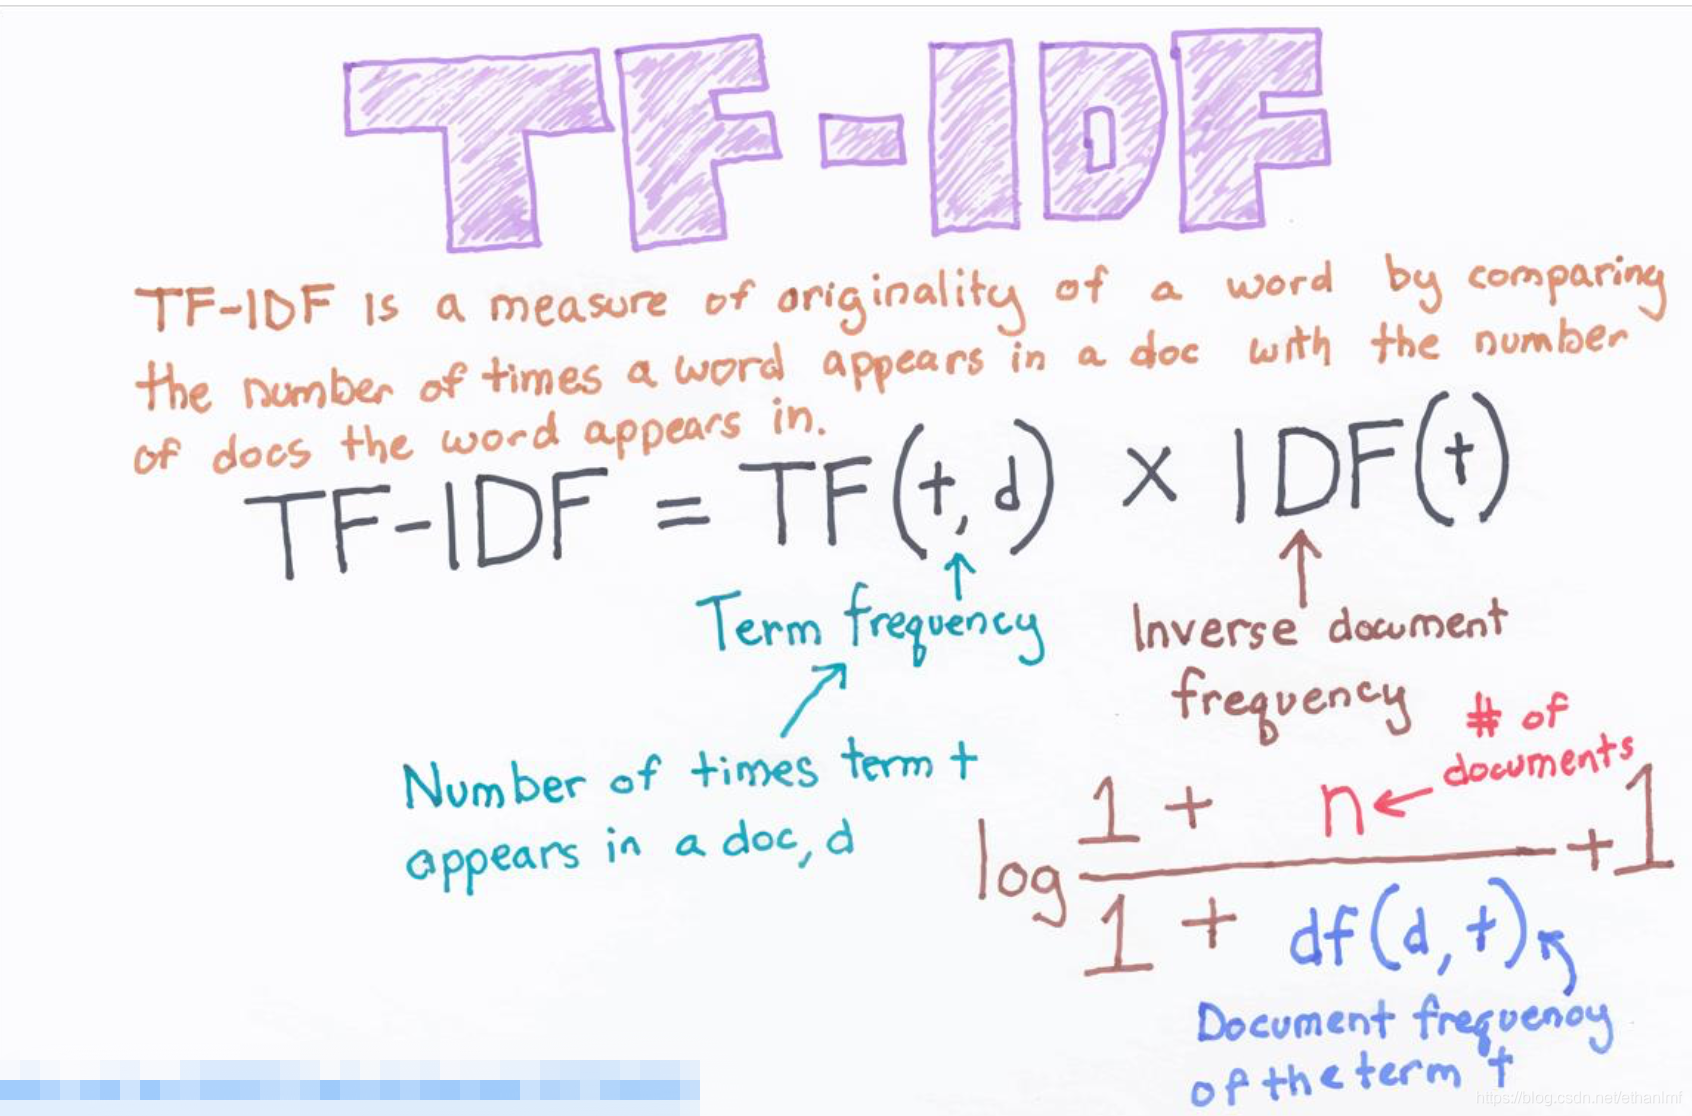

In [19]:
# TF-IDF :
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=18000)
tfidf_vector = tfidf.fit_transform(df_text['text']) 

tfidf_vector

tfidf_train = tfidf_vector[0:200000]
tfidf_test = tfidf_vector[200000:]

## Text classification based on the machine learning model : TF-IDF + RidgeClassifierCV

Now, we want to build a Machine Learning model that can understand the pattern based on the words present in the strings.

In [20]:
# RidgeClassifierCV
 
import time 

since = time.time()

from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(tfidf_train, train_df['label'], test_size = 0.2, random_state= 18000)

clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1])

clf.fit(X_train, y_train.values) 

val_pred = clf.predict(X_test)

print(f1_score(y_test.values, val_pred, average='macro'))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

0.9286418480575084
Training complete in 47m 25s


In [21]:
pred_clf = clf.predict(tfidf_test)
print(pred_clf)
pred_clf1 = pd.DataFrame({'label':pred_clf}) 

pred_clf1.to_csv('pred_clf.csv',index = False)

[1 2 8 ... 1 3 1]


In [24]:
xx = pd.read_csv('pred_clf.csv')
xx.info

<bound method DataFrame.info of        label
0          1
1          2
2          8
3          5
4          0
...      ...
49995      0
49996     13
49997      1
49998      3
49999      1

[50000 rows x 1 columns]>

# Final Ranking & Score

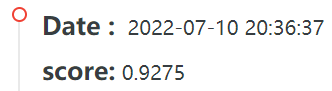

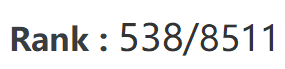